In [1]:
# Nondementia         0
# Very Mild Dementia  1
# Mild Dementia       2 
# Moderate Dementia   3

In [2]:
import pandas as pd
import numpy as np

#maschi 1 femmine 0
#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = r'C:\Users\italo\OneDrive\Desktop'
file = 'yoo.csv'
df_2 = pd.read_csv(f'{directory}/{file}')

print(df_2.shape)
df_2.head(5)

(216, 12)


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [3]:
df_2 = df_2.drop(columns = ['Hand', 'Delay', 'ID']) #we dropped these two variables becauese are useless
df_2.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,"1,306"
1,0,55,4,1,29,0,1147,0.810,"1,531"
2,0,73,4,3,27,1,1454,0.708,"1,207"
3,1,74,5,2,30,0,1636,0.689,"1,073"
4,0,52,3,2,30,0,1321,0.827,"1,329"


In [4]:
classes = df_2['CDR'].unique()  #to create a list of labels
print(classes)

[0 1 2 3]


In [5]:
df_2['ASF'] = df_2['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type

In [6]:
df_2.dtypes

M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

## Multinomial Logistic Regression


In [7]:
#multinomial logistic regression
#multinomial logistic regression is a classification method that generalizes logistic regression to multiclass problems, 
#i.e. with more than two possible discrete outcomes. That is, it is a model that is used to predict the probabilities of 
#the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables 
#(which may be real-valued, binary-valued, categorical-valued, etc.).

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

X = df_2.loc[:, df_2.columns != 'CDR']
y = df_2.loc[:, df_2.columns == 'CDR'] #this is target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train)
y_train = y_train.ravel()

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000, random_state = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print('Test score is: ' + str(acc_score))
#y = np.array(os_data_y)
#y = y.ravel()
#mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000).fit(os_data_X, y)
#print ("Multinomial Logistic regression Train Accuracy: ", metrics.accuracy_score(y_train, mul_lr.predict(X_train)))
#print ("Multinomial Logistic regression Test Accuracy: ", metrics.accuracy_score(y_test, mul_lr.predict(X_test)))

Test score is: 0.8153846153846154


## Confusion Matrix

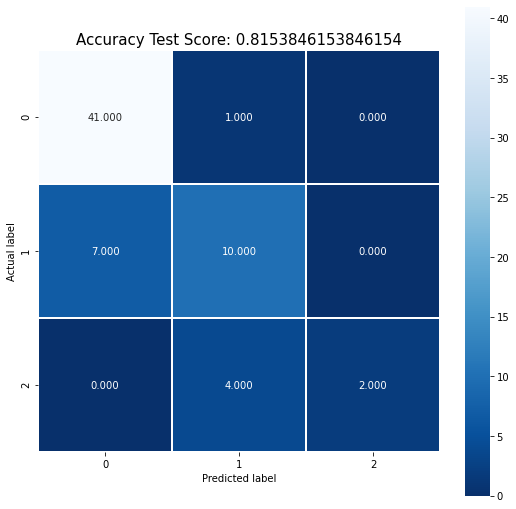

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Test Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15)
plt.show()

# RFE

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings

data_final_vars=df_2.columns.values.tolist()
#print('Our starting variables are: ' + str(data_final_vars).replace('[', '').replace(']', ''), '\n')
print('Variables, except target variable, are: ' + str(X.columns.values.tolist()), '\n')
warnings.filterwarnings("ignore")
#y=['CDR']
#X=['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

logreg = LogisticRegression(max_iter=100000)
rfe = RFE(logreg, 4) #we selected first four variables
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_) #this is the mask of selected features
print(rfe.ranking_) #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature
#print(rfe.estimator_)
#print(rfe[rfe.support_])

Variables, except target variable, are: ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'] 

[ True False False False  True False  True  True]
[1 3 2 4 1 5 1 1]


In [10]:
# sono cambiate alcune features

In [11]:
df_RFE = X[:] #creates a copy of the previous dataframe
df_RFE = df_RFE.drop(columns = ['Age', 'Educ', 'SES', 'eTIV']) #dataframe with features selected with RFE
df_RFE.head()
#df_RFE = df_2.drop(columns = ['Hand', 'Delay', 'ID'])

,M/F,MMSE,nWBV,ASF
0,0,29,0.743,1.306
1,0,29,0.810,1.531
2,0,27,0.708,1.207
3,1,30,0.689,1.073
4,0,30,0.827,1.329


In [12]:
y_2 = df_2.loc[:, df_2.columns == 'CDR'] #this is target variable
y_2.head()

,CDR
0,0
1,0
2,1
3,0
4,0


## Multinomial Logistic Regression on dataframe post RFE

In [13]:
#https://lorenzogovoni.com/feature-selection-rfe/

#X = df_RFE.loc[:, df_2.columns != 'CDR']
#y = df_RFE.loc[:, df_2.columns == 'CDR']
X = df_RFE.loc[:]
y = df_RFE.loc[:]

X_train, X_test, y_train, y_test = train_test_split(df_RFE, y_2, test_size=0.3, random_state=0)

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train)
y_train = y_train.ravel()

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print('Test score is: ' + str(acc_score))

Test score is: 0.8153846153846154


## Confusion matrix

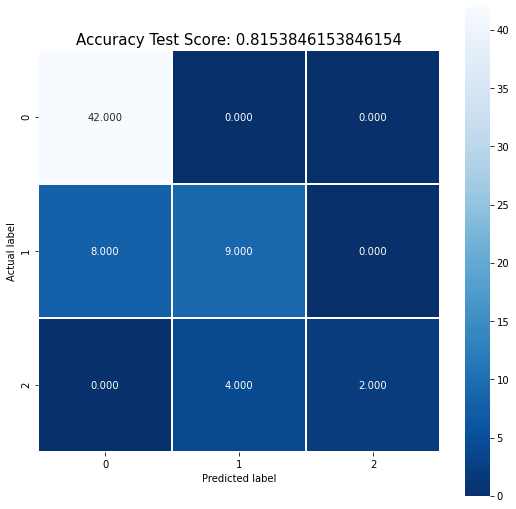

In [14]:
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Test Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15)
plt.show()

#### now we decided to merge labels 2 and 3

In [15]:
# Nondementia                      0
# Very Mild Dementia               1
# Mild and Moderate Dementia       4

In [16]:
import pandas as pd
import numpy as np

#maschi 1 femmine 0
#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = r'C:\Users\italo\OneDrive\Desktop\alzheimer'
file = 'our_merged_dataset.csv'
df_2 = pd.read_csv(f'{directory}/{file}')

print(df_2.shape)
df_2.head(5)

(216, 12)


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [17]:
df_2 = df_2.drop(columns = ['Hand', 'Delay', 'ID']) #we dropped these two variables becauese are useless
df_2.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,"1,306"
1,0,55,4,1,29,0,1147,0.810,"1,531"
2,0,73,4,3,27,1,1454,0.708,"1,207"
3,1,74,5,2,30,0,1636,0.689,"1,073"
4,0,52,3,2,30,0,1321,0.827,"1,329"


In [18]:
classes = df_2['CDR'].unique()  #to create a list of labels
print(classes)

[0 1 4]


In [19]:
df_2['ASF'] = df_2['ASF'].apply(lambda x: float(x.split()[0].replace(',', ''))) #now we see ASF like float64 type

In [20]:
df_2.dtypes

M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

## Multinomial Logistic Regression


In [21]:
X = df_2.loc[:, df_2.columns != 'CDR']
y = df_2.loc[:, df_2.columns == 'CDR'] #this is target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train)
y_train = y_train.ravel()

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000, random_state = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print('Test score is: ' + str(acc_score))

Test score is: 0.8153846153846154


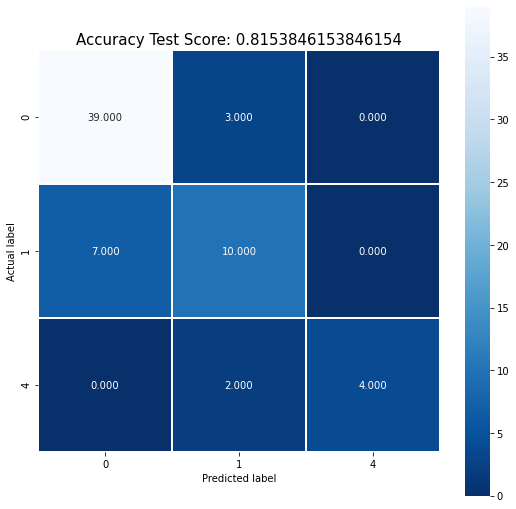

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=['0', '1', '4'], yticklabels=['0', '1', '4']);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Test Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15)
plt.show()

# RFE


In [23]:
data_final_vars=df_2.columns.values.tolist()
#print('Our starting variables are: ' + str(data_final_vars).replace('[', '').replace(']', ''), '\n')
print('Variables, except target variable, are: ' + str(X.columns.values.tolist()), '\n')
warnings.filterwarnings("ignore")
#y=['CDR']
#X=['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

logreg = LogisticRegression(max_iter=100000)
rfe = RFE(logreg, 4) #we selected first four variables
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_) #this is the mask of selected features
print(rfe.ranking_) #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature

Variables, except target variable, are: ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'] 

[ True False False  True  True False  True False]
[1 3 2 1 1 4 1 5]


In [24]:
df_RFE = X[:] #creates a copy of the previous dataframe
df_RFE = df_RFE.drop(columns = ['Age', 'Educ', 'eTIV', 'ASF']) #dataframe with features selected with RFE
df_RFE.head()

,M/F,SES,MMSE,nWBV
0,0,3,29,0.743
1,0,1,29,0.810
2,0,3,27,0.708
3,1,2,30,0.689
4,0,2,30,0.827


In [25]:
y_2 = df_2.loc[:, df_2.columns == 'CDR'] #this is target variable
y_2.head()

,CDR
0,0
1,0
2,1
3,0
4,0


## Multinomial Logistic Regression on dataframe post RFE

In [26]:
#https://lorenzogovoni.com/feature-selection-rfe/

#X = df_RFE.loc[:, df_2.columns != 'CDR']
#y = df_RFE.loc[:, df_2.columns == 'CDR']
X = df_RFE.loc[:]
y = df_RFE.loc[:]

X_train, X_test, y_train, y_test = train_test_split(df_RFE, y_2, test_size=0.3, random_state=0)

# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = np.array(y_train)
y_train = y_train.ravel()

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100000, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
print('Test score is: ' + str(acc_score))

Test score is: 0.8769230769230769


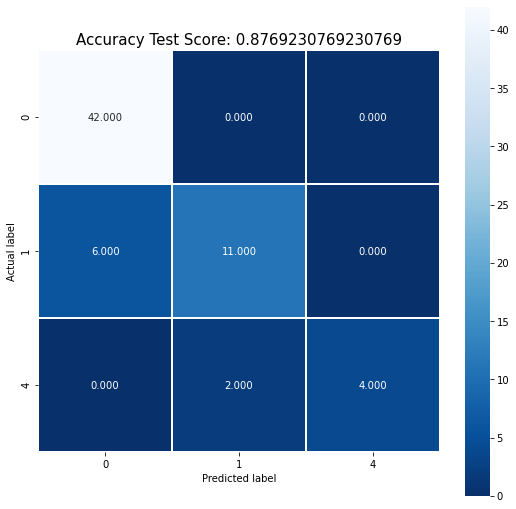

In [27]:
cm = metrics.confusion_matrix(y_test, y_pred)
#print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=['0', '1', '4'], yticklabels=['0', '1', '4']);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Test Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 15)
plt.show()